In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import Modules

In [3]:
import pandas as pd 
import numpy as np 
import os 
# for visiualisation
import seaborn as sns
import matplotlib.pyplot as plt
# for speech processing 
import librosa
import librosa.display 
# to play the audio 
from IPython.display import Audio
#
import warnings 
warnings.filterwarnings('ignore')

## Load the dataset 

In [4]:
labels = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        break
print('Dataset is loaded')

Dataset is loaded


In [5]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_raid_angry.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_gap_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust/OAF_good_disgust.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral/OAF_soup_neutral.wav']

In [6]:
labels[:5]

['fear', 'angry', 'fear', 'disgust', 'neutral']

## Create a dataFrame 

In [7]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,angry
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,disgust
4,/kaggle/input/toronto-emotional-speech-set-tes...,neutral


In [8]:
# Check how many labels are we having 
df['label'].value_counts()

fear       4
angry      4
disgust    4
neutral    4
sad        4
ps         4
happy      4
Name: label, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

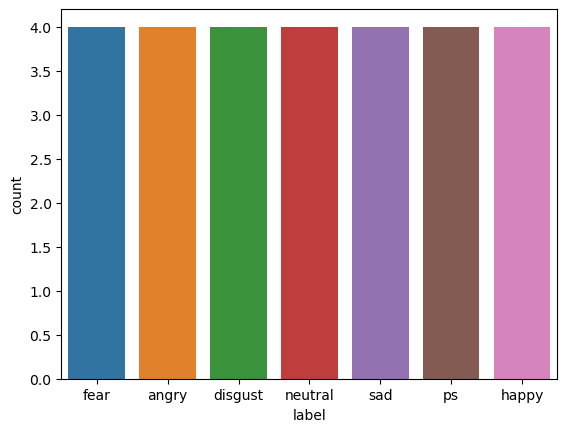

In [9]:
# sns.countplot(df['labels'])
sns.countplot(data=df, x='label')

Since all are in equal distribution, no class balancing is required

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr =sr)
    plt.show()

In [11]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    #convert to dB
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr =sr, x_axis = 'time', y_axis = "hz")
    plt.colorbar()

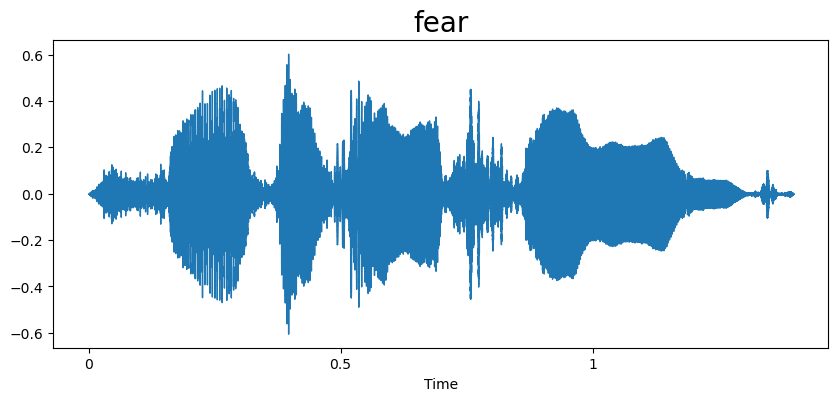

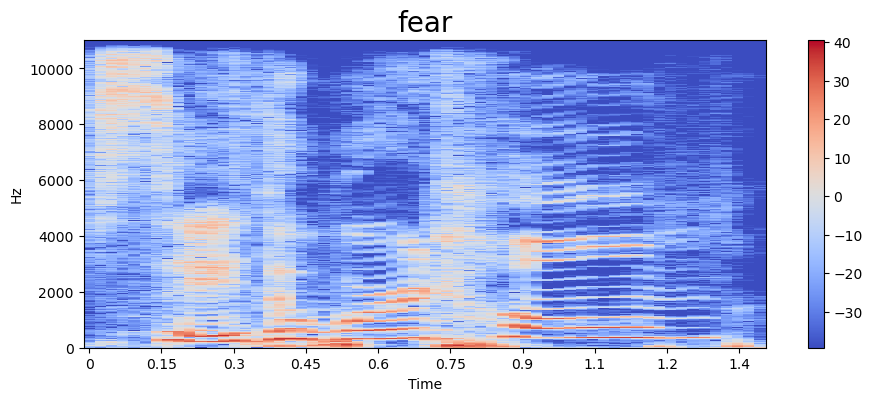

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

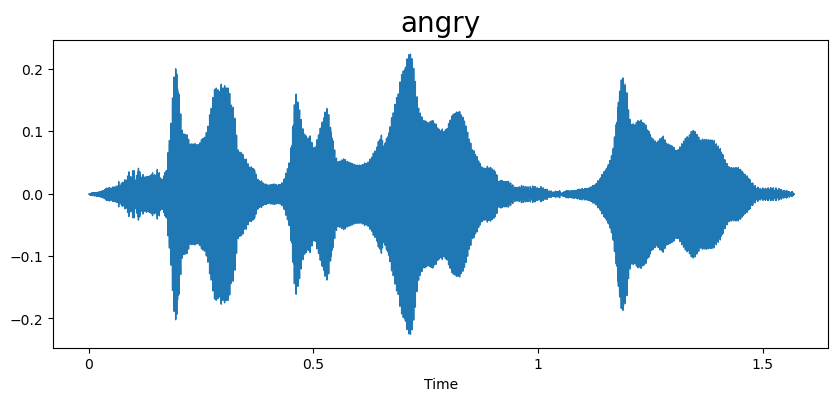

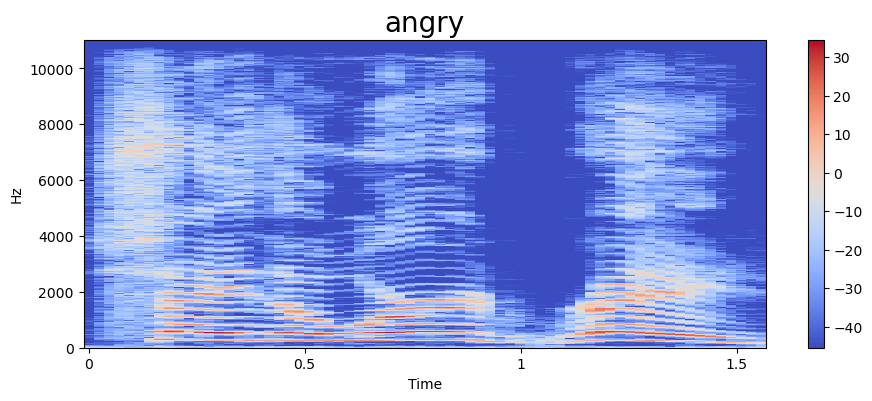

In [14]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

do same for all emotions

## Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-2.6373022e+02,  7.2944656e+01,  1.0004355e+01,  2.3303312e+01,
       -6.8856421e+00,  4.0754910e+00,  7.8389845e+00, -3.6625168e+00,
       -3.3025444e+00,  4.3450122e+00, -1.5940281e+01, -4.0636692e+00,
        1.9067405e+00, -2.9413262e-01, -4.1818051e+00, -1.7142783e+00,
       -9.1880989e+00,  6.5911264e+00,  6.5510821e+00,  1.4123763e+01,
        1.8590611e+01,  1.0805551e+01, -9.6362996e-01,  2.2022021e+00,
       -5.5397310e+00,  7.3148332e+00, -2.2148058e-01, -3.1979790e+00,
       -7.9467287e+00, -1.1401870e+00, -2.9821582e+00,  4.6030445e+00,
       -6.4882326e+00, -4.8203025e+00, -2.3639333e+00,  2.5380762e+00,
       -1.3353246e+00,  1.6870289e+00,  5.9993434e+00,  6.5465550e+00],
      dtype=float32)

In [21]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
x_mfcc

0     [-263.73022, 72.94466, 10.004355, 23.303312, -...
1     [-398.8801, 67.652534, -6.403871, -13.4464445,...
2     [-451.5639, 59.601387, 3.9785483, -13.838255, ...
3     [-407.92496, 79.910614, 18.127052, -1.5200057,...
4     [-520.07574, 51.110794, 25.930706, 7.5169673, ...
5     [-318.61807, 17.89563, -20.14816, 12.95845, -2...
6     [-524.40826, 75.85567, 25.91589, 15.227775, 19...
7     [-414.98874, 92.06865, -4.287793, 0.47740957, ...
8     [-406.71164, 62.672665, -0.31975117, 16.878716...
9     [-490.28183, 91.49685, 3.3434715, -2.8820941, ...
10    [-309.76385, 37.786522, -14.717588, 18.069778,...
11    [-413.1081, 78.18323, 14.757902, -13.794521, -...
12    [-444.5274, 65.39576, 27.09956, 37.595512, 3.9...
13    [-379.0284, 53.91264, -18.588652, -13.864372, ...
14    [-263.73022, 72.94466, 10.004355, 23.303312, -...
15    [-398.8801, 67.652534, -6.403871, -13.4464445,...
16    [-451.5639, 59.601387, 3.9785483, -13.838255, ...
17    [-407.92496, 79.910614, 18.127052, -1.5200

In [50]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(28, 40)

In [51]:
## input split
X = np.expand_dims(X, -1)
X.shape
# three dimensional 
# first dimension will length of dataset
# second will be column length ie 40
# third will be one

#this 3 Dimensional format is excepted by the LSTM model 

(28, 40, 1)

In [43]:
## NOT WORKING
# #converting output labels to categorical values 
# from keras.utils import to_categorical
# y = to_categorical(df['label'])
# y.shape

In [53]:
# we can do label encoding or one hot encoding instead 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [54]:
y = y.toarray()

In [55]:
y.shape

(28, 7)

no need for train and test split 
we will be creating validation split in the model itself 

## Create the LSTM model

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [57]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                

In [58]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.9445 - accuracy: 0.1364 - val_loss: 1.9115 - val_accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 0s 124ms/step - loss: 1.8766 - accuracy: 0.1364 - val_loss: 1.8950 - val_accuracy: 0.1667
Epoch 3/50
1/1 [==============================] - 0s 110ms/step - loss: 1.8219 - accuracy: 0.2727 - val_loss: 1.8632 - val_accuracy: 0.1667
Epoch 4/50
1/1 [==============================] - 0s 112ms/step - loss: 1.7561 - accuracy: 0.3636 - val_loss: 1.8249 - val_accuracy: 0.1667
Epoch 5/50
1/1 [==============================] - 0s 118ms/step - loss: 1.7701 - accuracy: 0.2727 - val_loss: 1.7934 - val_accuracy: 0.1667
Epoch 6/50
1/1 [==============================] - 0s 114ms/step - loss: 1.4912 - accuracy: 0.5000 - val_loss: 1.7759 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 0s 112ms/step - loss: 1.6768 - accuracy: 0.3182 - val_loss: 1.7458 - val_accuracy: 0.1667
Epoch 8/50
1/1 [=======

## Plot the results

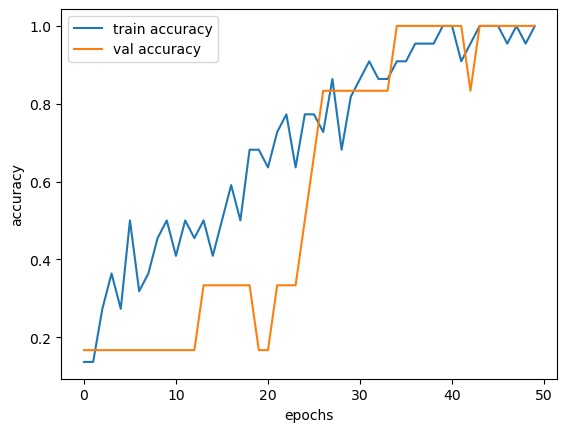

In [59]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

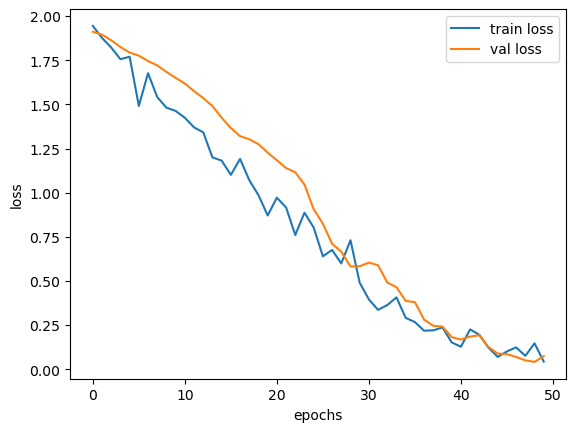

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()